In [1]:
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
import itertools
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Using TensorFlow backend.
C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\t

In [2]:
df = pd.read_csv(r'C:\Users\Mahe\Desktop\Wildfire-Predictor\final.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,date,lat,lon,mask,lst,lstn,ndvi,vcr,prec,ma_cat
0,2019-06-02,39.737500,-122.295833,9.0,310.26000,290.921693,0.3108,0.59,0.718065,1
1,2019-06-10,39.737500,-122.295833,5.0,323.92000,290.921693,0.2526,0.59,0.000000,0
2,2019-06-18,39.737500,-122.295833,5.0,309.33877,297.900000,0.2526,0.59,0.000000,0
3,2019-06-02,39.729167,-122.295833,9.0,310.36000,290.921693,0.3198,0.57,0.718065,1
4,2019-06-10,39.729167,-122.295833,5.0,321.90000,290.921693,0.2670,0.57,0.000000,0


In [3]:
X = df[['vcr', 'lst','ndvi','lstn','prec']] .values
x=df[['vcr', 'lst','ndvi','lstn','prec']]
y = df['ma_cat'].values

In [4]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-3.63030991e-01,  1.63890259e-01, -7.74358640e-01,
        -1.65104665e-14,  2.65105499e+00],
       [-3.63030991e-01,  2.59405503e+00, -1.12630579e+00,
        -1.65104665e-14, -5.90206435e-01],
       [-3.63030991e-01, -3.03379665e-14, -1.12630579e+00,
         2.02688551e+00, -5.90206435e-01],
       [-4.71069833e-01,  1.81680631e-01, -7.19933824e-01,
        -1.65104665e-14,  2.65105499e+00],
       [-4.71069833e-01,  2.23468952e+00, -1.03922608e+00,
        -1.65104665e-14, -5.90206435e-01]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

 # Before SMOTE

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
models.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
1333/1333 [==============================] - 1s 590us/step - loss: 0.5131 - accuracy: 0.8927
Epoch 2/100
1333/1333 [==============================] - 0s 127us/step - loss: 0.2780 - accuracy: 0.9415
Epoch 3/100
1333/1333 [==============================] - 0s 128us/step - loss: 0.2301 - accuracy: 0.9415
Epoch 4/100
1333/1333 [==============================] - 0s 146us/step - loss: 0.2225 - accuracy: 0.9415
Epoch 5/100
1333/1333 [==============================] - 0s 168us/step - loss: 0.2199 - accuracy: 0.9415
Epoch 6/100
1333/1333 [==============================] - 0s 159us/step - loss: 0.2177 - accuracy: 0.9415
Epoch 7/100
1333/1333 [==============================] - 0s 217us/step - loss: 0.2164 - accuracy: 0.9415
Epoch 8/100
1333/1333 [==============================] - 0s 176us/step - loss: 0.2146 - accuracy: 0.9415
Epoch 9/100
1333/1333 [==============================] - 0s 176us/step - loss: 0.2139 - accuracy: 0.9415
Epoch 10/100
1333/1333 [==============================

Epoch 76/100
1333/1333 [==============================] - 0s 131us/step - loss: 0.1790 - accuracy: 0.9430
Epoch 77/100
1333/1333 [==============================] - 0s 132us/step - loss: 0.1786 - accuracy: 0.9422
Epoch 78/100
1333/1333 [==============================] - 0s 133us/step - loss: 0.1774 - accuracy: 0.9430
Epoch 79/100
1333/1333 [==============================] - 0s 129us/step - loss: 0.1772 - accuracy: 0.94300s - loss: 0.1697 - accuracy: 0.
Epoch 80/100
1333/1333 [==============================] - 0s 125us/step - loss: 0.1772 - accuracy: 0.9422
Epoch 81/100
1333/1333 [==============================] - 0s 123us/step - loss: 0.1760 - accuracy: 0.9452
Epoch 82/100
1333/1333 [==============================] - 0s 139us/step - loss: 0.1756 - accuracy: 0.9460
Epoch 83/100
1333/1333 [==============================] - 0s 173us/step - loss: 0.1769 - accuracy: 0.9430
Epoch 84/100
1333/1333 [==============================] - 0s 169us/step - loss: 0.1752 - accuracy: 0.9445
Epoch 85/100
1

In [15]:
y_pred = model.predict(X_test)

In [20]:
y_pred = np.round(y_pred,decimals=0)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9458041958041958


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       541
           1       0.00      0.00      0.00        31

    accuracy                           0.95       572
   macro avg       0.47      0.50      0.49       572
weighted avg       0.89      0.95      0.92       572



C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

# After SMOTE

In [7]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [8]:
models = Sequential()
models.add(Dense(12, input_dim=5, activation='relu'))
models.add(Dense(8, activation='relu'))
models.add(Dense(8, activation='relu'))
models.add(Dense(1, activation='sigmoid'))

In [9]:
models.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
models.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
2510/2510 [==============================] - 1s 461us/step - loss: 0.6796 - accuracy: 0.6143
Epoch 2/100
2510/2510 [==============================] - 0s 137us/step - loss: 0.6402 - accuracy: 0.6793
Epoch 3/100
2510/2510 [==============================] - 0s 122us/step - loss: 0.5969 - accuracy: 0.7044
Epoch 4/100
2510/2510 [==============================] - 0s 122us/step - loss: 0.5735 - accuracy: 0.7060
Epoch 5/100
2510/2510 [==============================] - 0s 151us/step - loss: 0.5611 - accuracy: 0.7151
Epoch 6/100
2510/2510 [==============================] - 0s 127us/step - loss: 0.5510 - accuracy: 0.7195
Epoch 7/100
2510/2510 [==============================] - 0s 121us/step - loss: 0.5392 - accuracy: 0.7331
Epoch 8/100
2510/2510 [==============================] - 0s 121us/step - loss: 0.5299 - accuracy: 0.7299
Epoch 9/100
2510/2510 [==============================] - 0s 137us/step - loss: 0.5192 - accuracy: 0.7434
Epoch 10/100
2510/2510 [==============================

2510/2510 [==============================] - 0s 122us/step - loss: 0.2634 - accuracy: 0.8884
Epoch 77/100
2510/2510 [==============================] - 0s 121us/step - loss: 0.2631 - accuracy: 0.8968
Epoch 78/100
2510/2510 [==============================] - 0s 120us/step - loss: 0.2611 - accuracy: 0.8960
Epoch 79/100
2510/2510 [==============================] - 0s 120us/step - loss: 0.2598 - accuracy: 0.8908
Epoch 80/100
2510/2510 [==============================] - 0s 122us/step - loss: 0.2589 - accuracy: 0.8956
Epoch 81/100
2510/2510 [==============================] - 0s 120us/step - loss: 0.2608 - accuracy: 0.8956
Epoch 82/100
2510/2510 [==============================] - 0s 121us/step - loss: 0.2542 - accuracy: 0.8976
Epoch 83/100
2510/2510 [==============================] - 0s 121us/step - loss: 0.2555 - accuracy: 0.8980
Epoch 84/100
2510/2510 [==============================] - 0s 137us/step - loss: 0.2528 - accuracy: 0.8996
Epoch 85/100
2510/2510 [==============================] - 0

In [11]:
y_pred = models.predict(X_test)

In [12]:
y_pred = np.round(y_pred,decimals=0)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8531468531468531


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       541
           1       0.22      0.68      0.33        31

    accuracy                           0.85       572
   macro avg       0.60      0.77      0.63       572
weighted avg       0.94      0.85      0.89       572



Confusion matrix, without normalization
[[ 21  10]
 [ 74 467]]


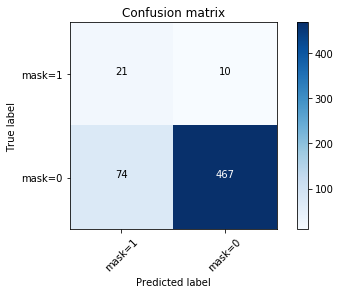

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

In [30]:
nn_probs = models.predict_proba(X_test)
nn_probs

array([[6.30e-01],
       [5.58e-04],
       [2.34e-04],
       [6.10e-02],
       [6.95e-01],
       [6.32e-04],
       [8.51e-01],
       [8.00e-02],
       [1.65e-01],
       [3.87e-05],
       [2.06e-03],
       [7.56e-01],
       [1.94e-03],
       [6.62e-02],
       [1.58e-01],
       [2.84e-01],
       [8.64e-03],
       [3.11e-01],
       [6.84e-01],
       [2.71e-02],
       [1.64e-02],
       [1.03e-01],
       [3.07e-01],
       [4.17e-02],
       [6.70e-03],
       [3.50e-02],
       [9.91e-01],
       [4.86e-06],
       [1.17e-01],
       [1.27e-04],
       [3.81e-02],
       [6.60e-02],
       [5.66e-07],
       [7.32e-03],
       [8.42e-01],
       [3.33e-05],
       [1.25e-06],
       [6.55e-03],
       [5.29e-04],
       [1.96e-02],
       [8.66e-04],
       [3.11e-05],
       [1.48e-01],
       [5.27e-01],
       [5.89e-02],
       [4.39e-03],
       [8.49e-01],
       [2.52e-01],
       [1.85e-06],
       [9.66e-03],
       [5.92e-01],
       [9.46e-01],
       [2.29

In [29]:
nn_probs = nn_probs[:, 1]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [31]:
prec, rec, _ = precision_recall_curve(y_test, nn_probs)
f1 = f1_score(y_test, y_pred) 

In [32]:
au = auc(rec, prec)
print('Neural network: f1=%.3f auc=%.3f' % (f1, au))

Neural network: f1=0.333 auc=0.252


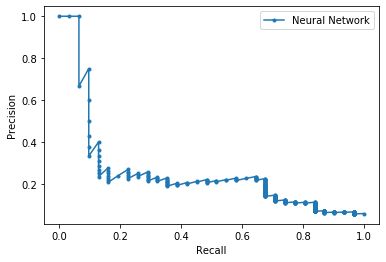

In [33]:
plt.plot(rec, prec, marker='.', label='Neural Network')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()